In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [41]:
# Load data
df_input = pd.read_csv("C:\\Users\\hp\\Downloads\\archive (1)\\diabetes_binary_health_indicators_BRFSS2015.csv")  # change this to your csv file
df_input.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [42]:
dependent_variable = "Diabetes_binary"

In [43]:
# Rebalancing the Data in a ratio of 1:2

df_diab = df_input[df_input[dependent_variable]==1]
df_no_diab = df_input[df_input[dependent_variable]==0]


print("Sample volume with Diabetes" , len(df_diab))
print("Sample Volume without Diabetes" , len(df_no_diab))

df_no_diab2 = df_no_diab.sample(frac=0.33).copy()

df = pd.concat([df_diab , df_no_diab2] , axis = 0)

# Randomizing row index
df = df.sample(frac=1).reset_index(drop=True)

print("volume of balanced dataframe" , len(df))

Sample volume with Diabetes 35346
Sample Volume without Diabetes 218334
volume of balanced dataframe 107396


In [44]:
df.head(30)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,1.0,41.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,1.0,2.0,0.0,0.0,7.0,5.0,8.0
1,0.0,1.0,1.0,1.0,32.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,10.0,6.0,6.0
2,0.0,0.0,0.0,1.0,22.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,5.0,3.0
3,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,11.0,5.0,7.0
4,0.0,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,4.0,6.0,8.0
5,0.0,0.0,0.0,1.0,21.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,1.0,0.0,0.0,0.0,4.0,6.0,6.0
6,0.0,0.0,0.0,1.0,34.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,9.0,4.0,7.0
7,0.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,4.0,0.0,7.0,1.0,0.0,11.0,6.0,3.0
8,0.0,1.0,1.0,1.0,15.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,5.0,0.0,30.0,1.0,0.0,8.0,3.0,1.0
9,1.0,1.0,1.0,1.0,37.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,30.0,0.0,1.0,0.0,8.0,6.0,8.0


In [45]:
df[dependent_variable].value_counts()

0.0    72050
1.0    35346
Name: Diabetes_binary, dtype: int64

In [46]:
# Separate features and target
X = df.drop(dependent_variable, axis=1)
y = df[dependent_variable]

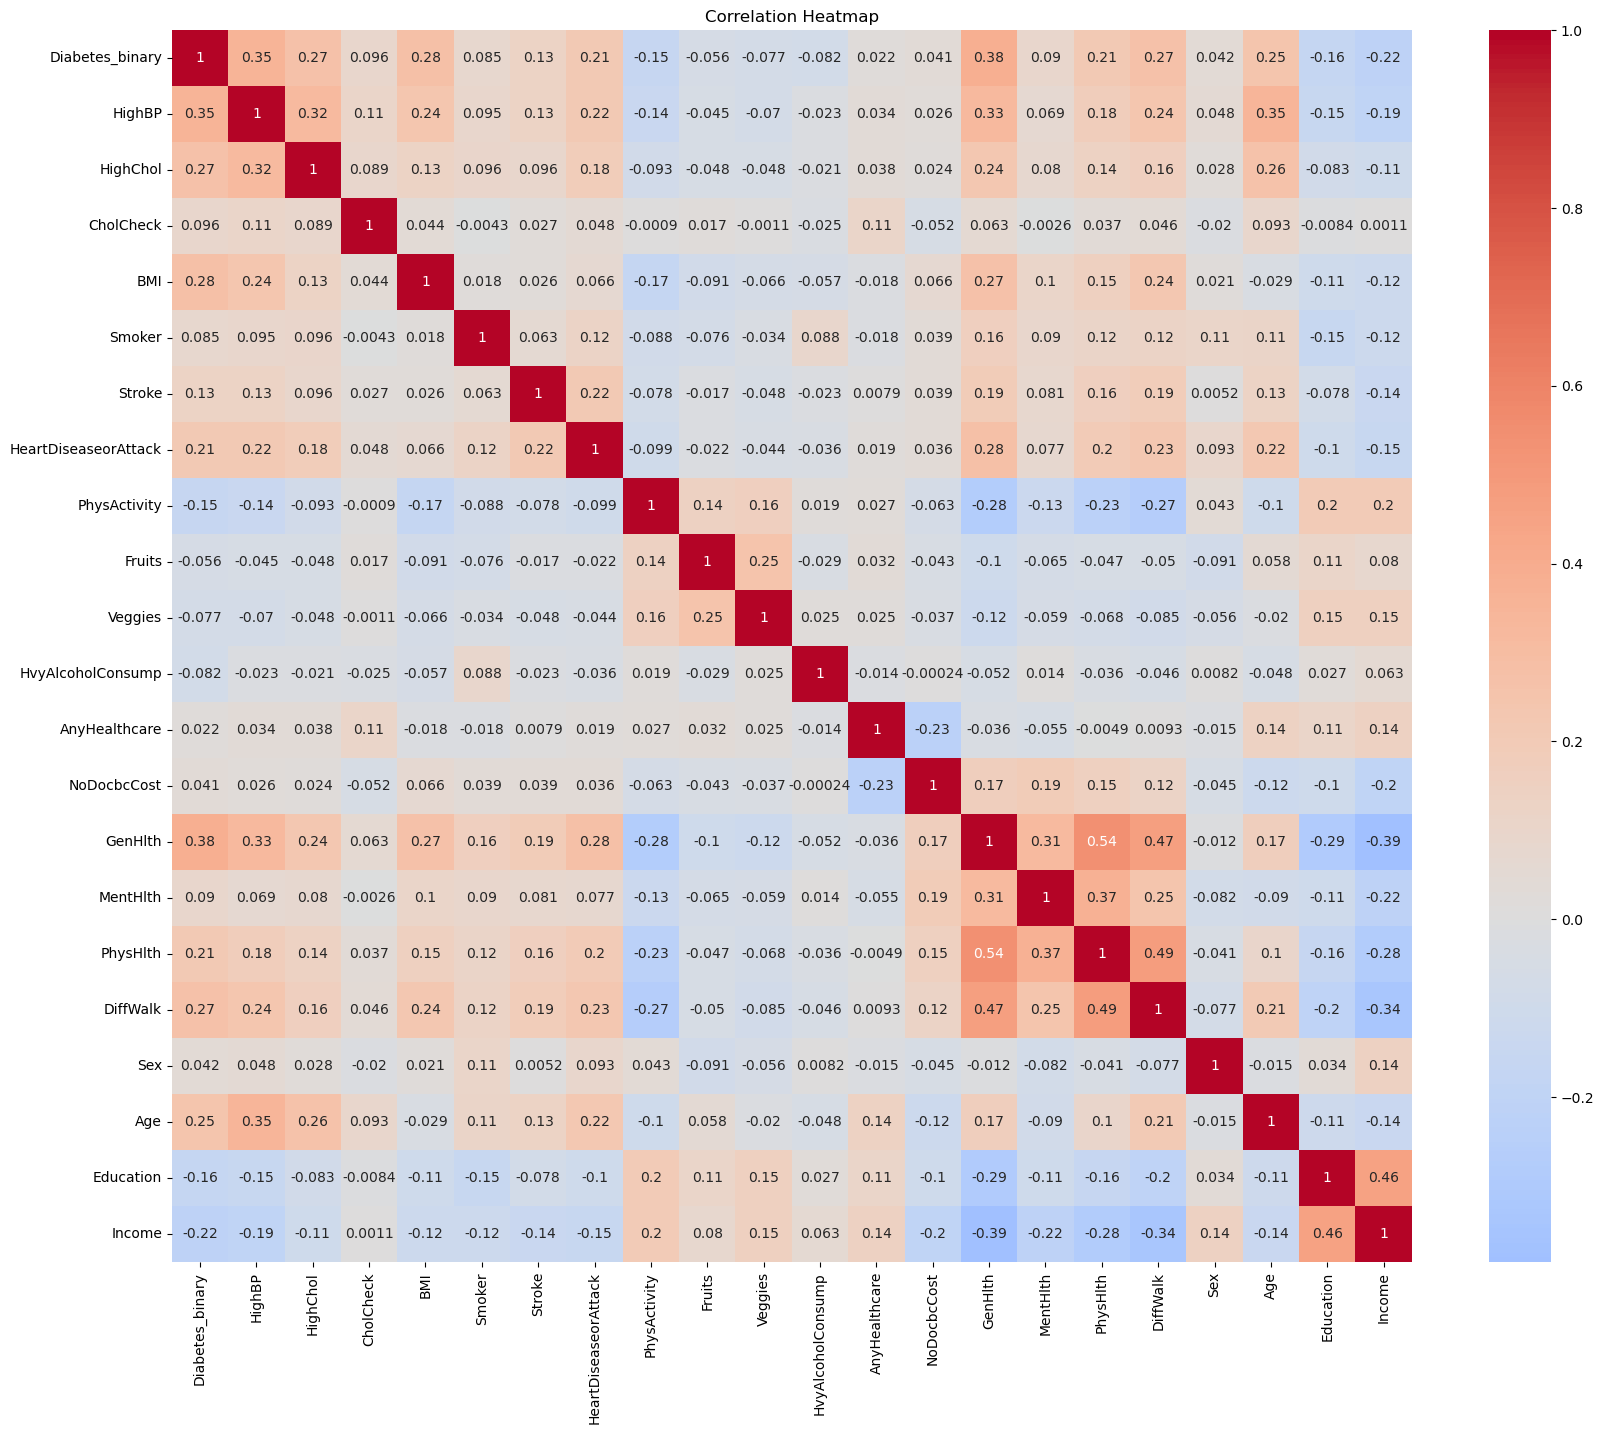

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.350642,0.268008,0.095662,0.279658,0.084503,0.127611,0.213077,-0.154183,-0.055631,...,0.022155,0.040628,0.383754,0.089707,0.213150,0.269799,0.042149,0.245075,-0.163902,-0.215141
HighBP,0.350642,1.000000,0.316714,0.107716,0.237720,0.095168,0.133635,0.216350,-0.138596,-0.045345,...,0.034470,0.025845,0.325741,0.068591,0.175801,0.238717,0.048050,0.345868,-0.151026,-0.191064
HighChol,0.268008,0.316714,1.000000,0.088979,0.125883,0.096382,0.096034,0.184985,-0.092552,-0.048198,...,0.038387,0.024264,0.235479,0.079610,0.138718,0.162007,0.027813,0.262003,-0.082555,-0.105857
CholCheck,0.095662,0.107716,0.088979,1.000000,0.044350,-0.004348,0.026862,0.048003,-0.000903,0.017159,...,0.111400,-0.051787,0.063320,-0.002606,0.036971,0.046201,-0.019992,0.093258,-0.008422,0.001112
BMI,0.279658,0.237720,0.125883,0.044350,1.000000,0.017707,0.026495,0.066365,-0.165323,-0.090610,...,-0.017729,0.065503,0.268190,0.104145,0.154232,0.235029,0.021318,-0.029244,-0.109497,-0.124434
Smoker,0.084503,0.095168,0.096382,-0.004348,0.017707,1.000000,0.063418,0.122733,-0.087934,-0.076466,...,-0.018258,0.039142,0.159446,0.090342,0.117013,0.122432,0.106003,0.114369,-0.148258,-0.116907
Stroke,0.127611,0.133635,0.096034,0.026862,0.026495,0.063418,1.000000,0.215830,-0.077823,-0.017277,...,0.007942,0.038689,0.188267,0.081039,0.158997,0.187332,0.005167,0.125502,-0.077637,-0.137782
HeartDiseaseorAttack,0.213077,0.216350,0.184985,0.048003,0.066365,0.122733,0.215830,1.000000,-0.098719,-0.021894,...,0.019129,0.036116,0.276258,0.077340,0.196330,0.227863,0.093172,0.224459,-0.102453,-0.151311
PhysActivity,-0.154183,-0.138596,-0.092552,-0.000903,-0.165323,-0.087934,-0.077823,-0.098719,1.000000,0.139895,...,0.027486,-0.062684,-0.277137,-0.130501,-0.231527,-0.271054,0.043230,-0.104122,0.199172,0.202825
Fruits,-0.055631,-0.045345,-0.048198,0.017159,-0.090610,-0.076466,-0.017277,-0.021894,0.139895,1.000000,...,0.031716,-0.043081,-0.102312,-0.065100,-0.046731,-0.049962,-0.090556,0.058030,0.106956,0.080257


In [47]:
# Correlation Matrix and Heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()

correlation_matrix

In [48]:
# Define the models and their corresponding parameters for GridSearchCV
models = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100, 200],
            'max_depth': [3, 5, 8 ,10],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7, 9]
        }
    }

}


print(models.items())

dict_items([('Random Forest', {'model': RandomForestClassifier(), 'params': {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, 8, 10], 'min_samples_split': [2, 5, 10]}}), ('Boosting', {'model': GradientBoostingClassifier(), 'params': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7, 9]}})])


In [49]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(len(X_train)/(len(X_train)+len(X_test)))

0.7999925509329956


Grid Search Iteration
GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='neg_mean_squared_error')
best_model = 
RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=200)


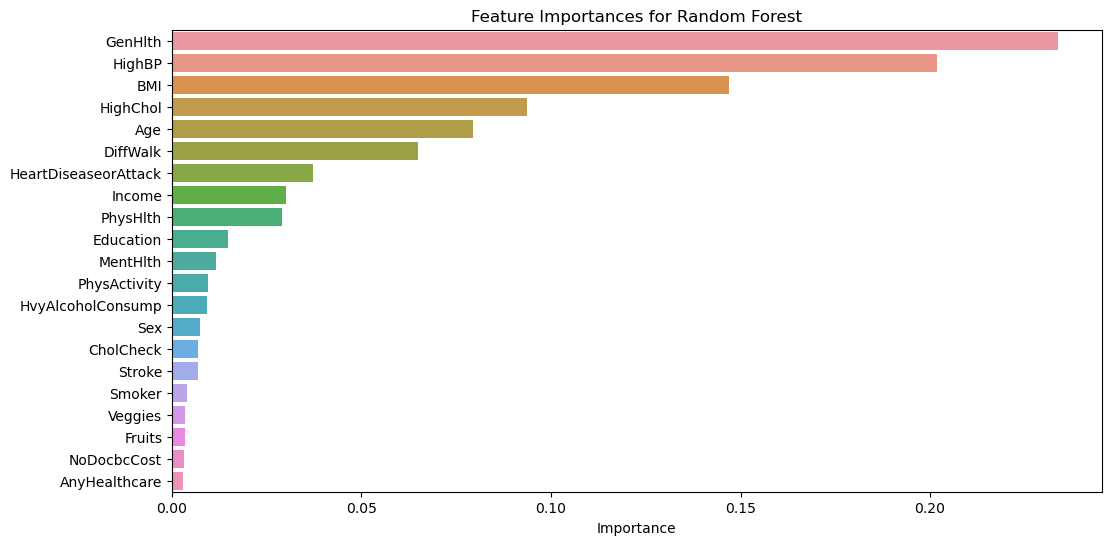

Grid Search Iteration
GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')
best_model = 
GradientBoostingClassifier(n_estimators=200)


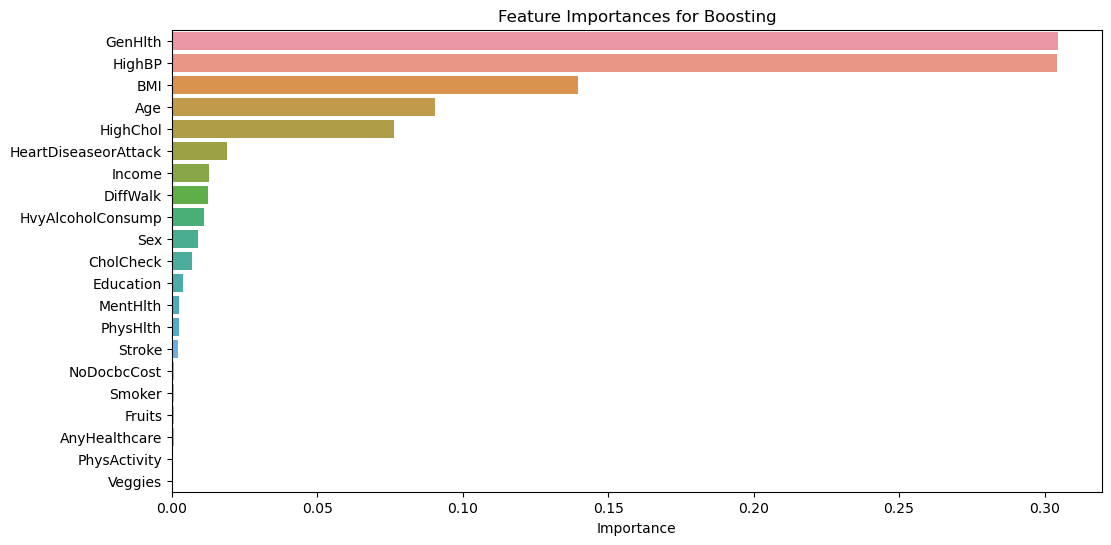

In [59]:
# Initialize a list to store the model performance
performance_list = []
prediction_list = {'Random Forest' : {'Training' : [],
                                      'Testing' : []
                                     },
                   'Boosting' : {'Training' : [],
                                      'Testing' : []
                                     },
                   'KNN' : {'Training' : [],
                                      'Testing' : []
                                     }
                  }

for name, model in models.items():
    # Perform GridSearchCV for hyperparameter tuning
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='neg_mean_squared_error')
    print('Grid Search Iteration')
    print(grid_search)
    grid_search.fit(X_train, y_train)
    
    # Train model with best parameters
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    print('best_model = ')
    print(best_model)
    
    # save the model to disk
    filename = name.replace(' ','') + '_model.sav'
    pickle.dump(best_model, open(filename, 'wb'))
    
    # Predict and calculate in-sample loss
    in_sample_preds = best_model.predict(X_train)
    in_sample_loss = mean_squared_error(y_train, in_sample_preds)
    
    
    # Predict and calculate out-of-sample loss
    out_of_sample_preds = best_model.predict(X_test)
    out_of_sample_loss = mean_squared_error(y_test, out_of_sample_preds)
    
    prediction_list[name]['Training'] += list(in_sample_preds)
    prediction_list[name]['Testing'] += list(out_of_sample_preds)
    
    # Append model performance to the list
    performance_list.append({
        "Model": name, 
        "Best Parameters": grid_search.best_params_, 
        "In-Sample Loss": in_sample_loss,
        "Out-of-Sample Loss": out_of_sample_loss
    })
    
    # Calculate and print feature importances
    feature_importances = best_model.feature_importances_
    importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
    importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
    # Plot feature importances
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y=importance_df.index, data=importance_df)
    plt.title(f'Feature Importances for {name}')
    plt.show()

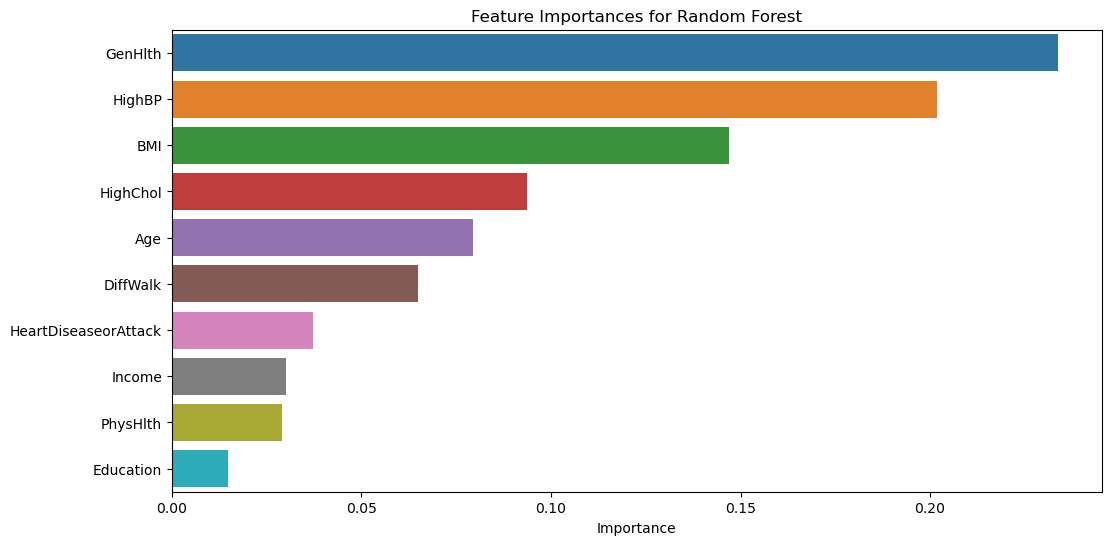

In [86]:
# Calculate and print feature importances (top 10 :Random Forest)

loaded_model = pickle.load(open('RandomForest_model.sav', 'rb'))


feature_importances = loaded_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
name = "Random Forest"
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index[:10], data=importance_df.head(10))
plt.title(f'Feature Importances for {name}')
plt.show()



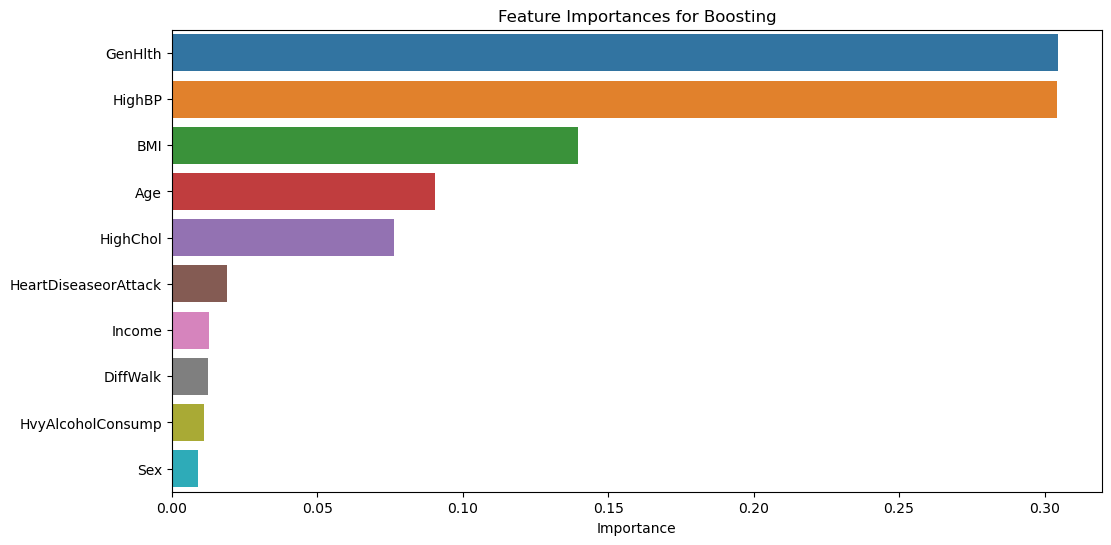

In [87]:
# Calculate and print feature importances (top 10 : Boosting)

loaded_model = pickle.load(open('Boosting_model.sav', 'rb'))


feature_importances = loaded_model.feature_importances_
importance_df = pd.DataFrame(feature_importances, index=X.columns, columns=['Importance'])
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importances
name = "Boosting"
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=importance_df.index[:10], data=importance_df.head(10))
plt.title(f'Feature Importances for {name}')
plt.show()



In [88]:
# Convert list to DataFrame and print model performances as a table
performance_df = pd.DataFrame(performance_list)
print(performance_df.to_markdown(index=False))

# Print the footnotes
print("\n\nFootnotes:")
print("Model - The type of model used.")
print("Best Parameters - The optimal hyperparameters found by GridSearchCV for this model.")
print("In-Sample Loss - The mean squared error loss of the model on the training data.")
print("Out-of-Sample Loss - The mean squared error loss of the model on the test data.")

| Model         | Best Parameters                                                 |   In-Sample Loss |   Out-of-Sample Loss |
|:--------------|:----------------------------------------------------------------|-----------------:|---------------------:|
| Random Forest | {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200} |         0.222299 |             0.234032 |
| Boosting      | {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}     |         0.23218  |             0.232495 |


Footnotes:
Model - The type of model used.
Best Parameters - The optimal hyperparameters found by GridSearchCV for this model.
In-Sample Loss - The mean squared error loss of the model on the training data.
Out-of-Sample Loss - The mean squared error loss of the model on the test data.


In [96]:
# KNN MODEL Creation for different values of K

import pickle
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
i = list(range(5,205,5))  # Number of neighbors to consider (you can tune this value)
for k in i:
    print('k= ',k)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred_class = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_class)
    mse = mean_squared_error(y_test, y_pred_class)
    
    # save the model to disk
    filename = 'knn_model_' + str(k) + '.sav'
    pickle.dump(knn_classifier, open(filename, 'wb'))
    
    # Predict and calculate in-sample loss
    knn_in_sample_preds_class = knn_classifier.predict(X_train)
    knn_in_sample_loss_class = mean_squared_error(y_train, knn_in_sample_preds_class)
    
    # Predict and calculate out-of-sample loss
    knn_out_of_sample_preds_class = knn_classifier.predict(X_test)
    knn_out_of_sample_loss_class = mean_squared_error(y_test, knn_out_of_sample_preds_class)
    
    print("Accuracy:", accuracy)
    print("Mean Squared Error:", mse)
    print('Classifier in sample loss='  , knn_in_sample_loss_class)
    print('Classifier out of sample loss=' , knn_out_of_sample_loss_class)
#     print('Regressor in sample loss='  , in_sample_loss)
#     print('Regressor out of sample loss=' , out_of_sample_loss)
    print('======================')

k=  5
Accuracy: 0.7272346368715084
Mean Squared Error: 0.27276536312849164
Classifier in sample loss= 0.1933516457935658
Classifier out of sample loss= 0.27276536312849164
k=  10
Accuracy: 0.7350093109869646
Mean Squared Error: 0.2649906890130354
Classifier in sample loss= 0.2232296661855766
Classifier out of sample loss= 0.2649906890130354
k=  15
Accuracy: 0.7414338919925512
Mean Squared Error: 0.2585661080074488
Classifier in sample loss= 0.22924717165603614
Classifier out of sample loss= 0.2585661080074488
k=  20
Accuracy: 0.7445065176908753
Mean Squared Error: 0.2554934823091248
Classifier in sample loss= 0.2352064807486382
Classifier out of sample loss= 0.2554934823091248
k=  25
Accuracy: 0.7458100558659218
Mean Squared Error: 0.2541899441340782
Classifier in sample loss= 0.23638204758135853
Classifier out of sample loss= 0.2541899441340782
k=  30
Accuracy: 0.7462756052141527
Mean Squared Error: 0.2537243947858473
Classifier in sample loss= 0.23950137343451744
Classifier out of sa

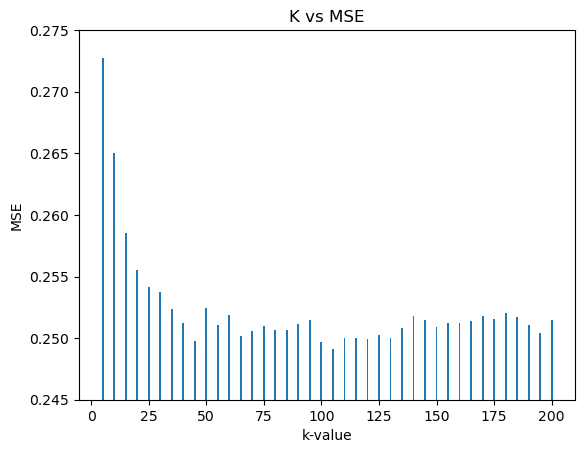

In [177]:
# Plotting graph between K and MSE on testing dataset to check most optimal k value

knn_k_dict = {}

for i in list(range(5,205,5)) :
    loaded_model = pickle.load(open('knn_model_'+str(i)+'.sav', 'rb'))
    y_pred_test = loaded_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred_test)
    knn_k_dict[i] = mse
    
categories = list(knn_k_dict.keys())
values = list(knn_k_dict.values())

# Create a bar plot
plt.bar(categories, values)

# Optionally, you can add labels and a title to the plot
plt.xlabel('k-value')
plt.ylabel('MSE')
plt.title('K vs MSE')
plt.ylim(0.245,0.275)
plt.t

# Display the plot
plt.show()

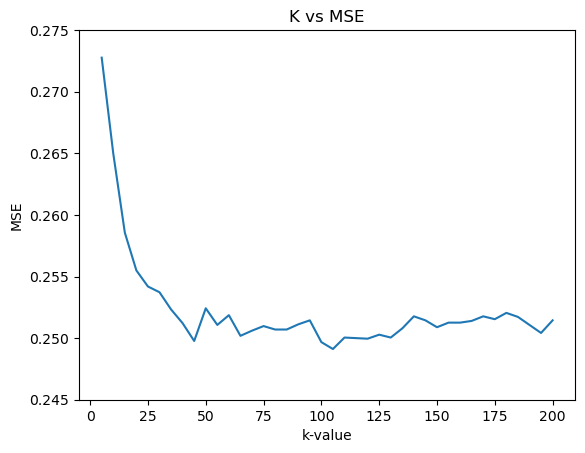

In [179]:
# Create a Line plot
plt.plot(categories, values)

# Optionally, you can add labels and a title to the plot
plt.xlabel('k-value')
plt.ylabel('MSE')
plt.title('K vs MSE')
plt.ylim(0.245,0.275)

# Display the plot
plt.show()

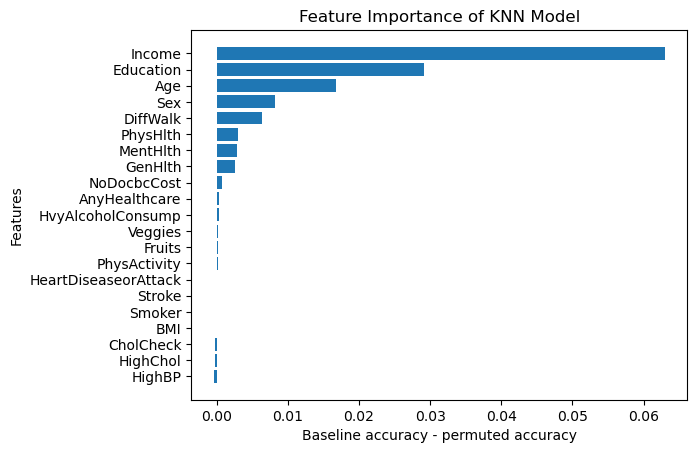

In [152]:
# Calculating Feature importance equivalent for KNN model through feature permutation technique on training data

from sklearn.metrics import accuracy_score
import numpy as np

list_columns = list(df.columns)[1:]

loaded_model = pickle.load(open('knn_model_100.sav', 'rb'))
y_pred_train = loaded_model.predict(X_train)


# Calculate the accuracy on the training dataset
baseline_accuracy = accuracy_score(y_train, y_pred_train)

# Calculate feature importance based on feature permutation
feature_importance = {}
for i in list(X_train.columns):
    #print("feature =  " , i)
    X_train_permuted = X_train.copy()
    X_train_permuted[i] = np.random.permutation(X_train_permuted[i].values)
    permuted_accuracy = accuracy_score(y_train, loaded_model.predict(X_train_permuted))
    feature_importance[i] = baseline_accuracy - permuted_accuracy
    
    
# Plot the feature importance
feature_names = [i for i in list(X_train.columns)]
sorted_indices = np.argsort(list(feature_importance.values()))

# Sort the feature_names and feature_importance based on sorted_indices
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importance = [feature_importance[feature_names[i]] for i in sorted_indices]


plt.barh(feature_names, sorted_feature_importance)
plt.xlabel('Baseline accuracy - permuted accuracy')
plt.ylabel('Features')
plt.title('Feature Importance of KNN Model')
plt.show()

In [153]:
df2 = pd.concat([X_test,y_test] , axis = 1)

# loading models for predicting on test data
# model_list = ['knn_model_100.sav','Boosting_model.sav','RandomForest_model.sav']
model_list = {'knn_model_100.sav':'knn_100_pred' , 'Boosting_model.sav':'boosting_pred' , 'RandomForest_model.sav':'random_forest_pred'}

for i in model_list.keys():
    loaded_model = pickle.load(open(i, 'rb'))
    result = loaded_model.predict(X_test)
    score_series = pd.Series(result , index = df2.index)
    df2[model_list[i]] = score_series
    
# Summarizing predictions and actual value rank-ordering for all the variables in test data (mean values) 

for i in list(df2.columns):
    print('Variable = ' , i)
    print(df2.groupby(i).aggregate({'Diabetes_binary':'mean','knn_100_pred':'mean','boosting_pred':'mean','random_forest_pred':'mean'}))
    print('===========================')

Variable =  HighBP
        Diabetes_binary  knn_100_pred  boosting_pred  random_forest_pred
HighBP                                                                  
0.0            0.160196      0.099509       0.066154             0.03808
1.0            0.495930      0.415458       0.522410             0.50276
Variable =  HighChol
          Diabetes_binary  knn_100_pred  boosting_pred  random_forest_pred
HighChol                                                                  
0.0              0.205496      0.151507       0.126507            0.103280
1.0              0.461863      0.373039       0.477451            0.452843
Variable =  CholCheck
           Diabetes_binary  knn_100_pred  boosting_pred  random_forest_pred
CholCheck                                                                  
0.0               0.080871      0.082426       0.031104            0.043546
1.0               0.334837      0.262082       0.301243            0.276239
Variable =  BMI
      Diabetes_binary  knn

          Diabetes_binary  knn_100_pred  boosting_pred  random_forest_pred
DiffWalk                                                                  
0.0              0.257977      0.155331       0.190552            0.160007
1.0              0.582298      0.630041       0.671027            0.671681
Variable =  Sex
     Diabetes_binary  knn_100_pred  boosting_pred  random_forest_pred
Sex                                                                  
0.0         0.310135      0.260097       0.275675            0.269156
1.0         0.348123      0.252560       0.314510            0.269418
Variable =  Age
      Diabetes_binary  knn_100_pred  boosting_pred  random_forest_pred
Age                                                                   
1.0          0.048101      0.007595       0.002532            0.002532
2.0          0.047619      0.018315       0.010989            0.012821
3.0          0.076736      0.030451       0.020706            0.030451
4.0          0.127962      0.0445

In [151]:
# Calculate Accuracy and Recall for the models
# load the model from disk
from sklearn.metrics import recall_score
model_list = ['RandomForest_model.sav' , 'Boosting_model.sav' , 'knn_model_100.sav']
for i in model_list:
    print("Model = " , i[:-4])
    loaded_model = pickle.load(open(i, 'rb'))
    result = loaded_model.predict(X_test)
    accuracy = accuracy_score(y_test, result)
    recall = recall_score(y_test,result)
    print("Model Accuracy:", accuracy)
    print("Model Recall:", recall)
    print("==========")

Model =  RandomForest_model
Model Accuracy: 0.7659683426443203
Model Recall: 0.5538483425807369
Model =  Boosting_model
Model Accuracy: 0.7675046554934823
Model Recall: 0.5926874377578603
Model =  knn_model_100
Model Accuracy: 0.7503258845437616
Model Recall: 0.5107412149665671


THE END